# XEFI Literature Reproduction
### Reproducing the Toland example from literature.

Tolan, Metin. 

"X-Ray Scattering from Soft-Matter Thin Films: Materials Science and Basic Research."

Springer Tracts in Modern Physics. Springer, 1999. https://doi.org/10.1007/bfb0112834.

In [1]:
import XEFI
import kkcalc as kk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc

In [2]:
refractive_db = kk.models.asp_db_complex
refractive_air = 1.0 + 0j
refractive_PS = refractive_db("C8H8", density=1.05, name="PS")
refractive_Si = refractive_db("Si", density=2.329, name="Si")

C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\common.py:402: UserWarning: Setting a formula mass will not be internally used when a `stoichiometry` has been assigned.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1912: UserWarning: When generating `asp_complex`, the energy intervals of real (10.00, 30000.00) and imaginary (10.00, 500000.00) components don't match.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1931: UserWarning: Real energies are a subset of imaginary energies, truncating imaginary energies to match real.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:624: UserWarning: (ASP 'PS'(507 en segments, 5 coefficients.)) Energies have changed length. Coefficients set to `None`.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\mode

In [3]:
# Wavelength / Beam Energy
wav = 1.54  # Å
beam_energy = (XEFI.models.basic.en2wav) / wav  # in eV
print(f"{beam_energy:0.2f} eV")

# Angles of Incidence
angles = np.linspace(0.01, 2, 3000)  # in degrees

# Interfaces / Thicknesses
z = [
    0,
    -800,
]  # Z-coordinates for the multilayer interface

# Refractive indexes
refractive_indicies: list[kk.models.asp_complex] = [
    refractive_air,
    refractive_PS,
    refractive_Si,
]

# Layer names
labels = ["Air"] + [ref.name for ref in refractive_indicies[1:]]

8050.92 eV


In [4]:
result = XEFI.XEF_Basic(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
    method=XEFI.XEF_method.TOLAN,
)

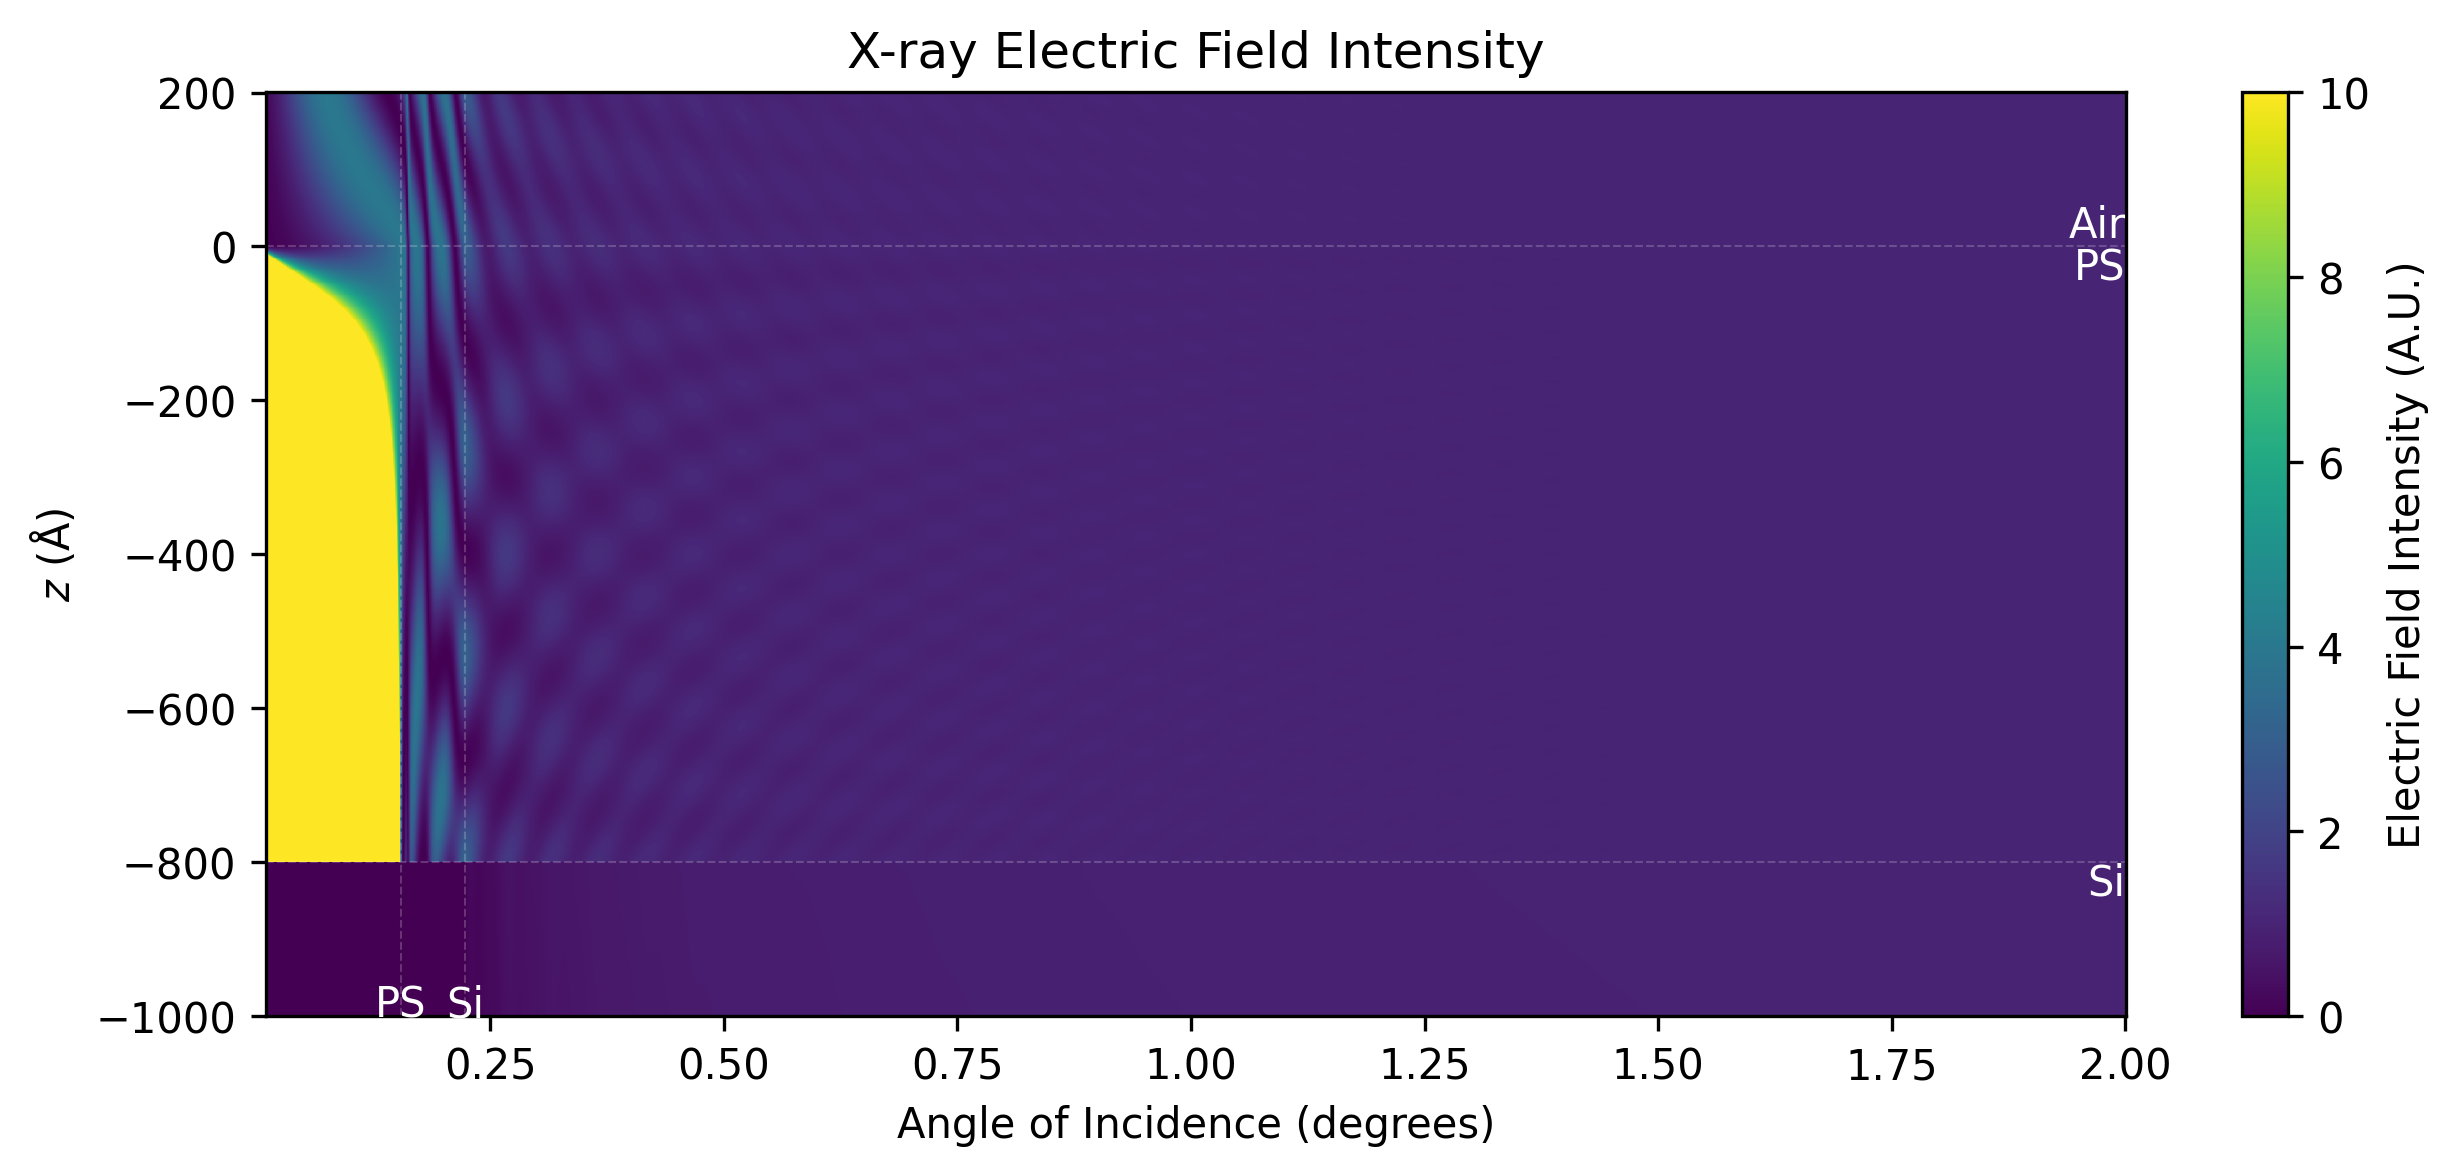

In [5]:
z_vals = np.linspace(200, -1000, 1000)
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig, ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)

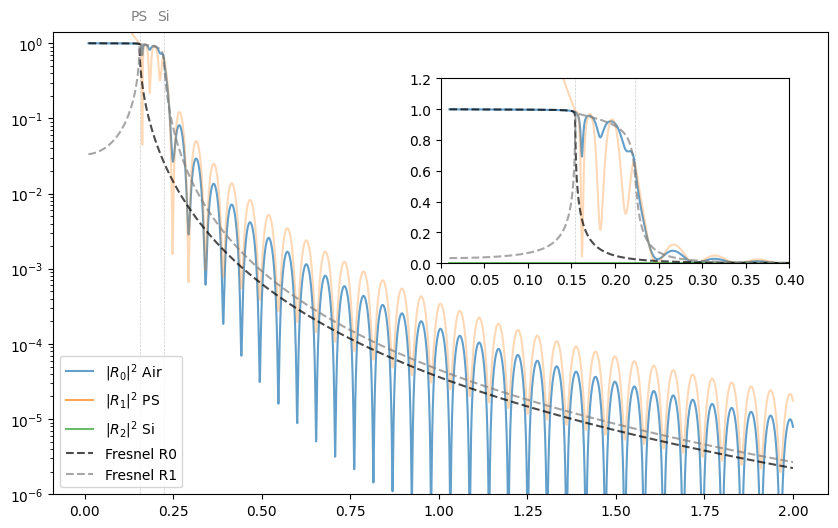

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
result.graph_field_coefficients(inset_loc="upper right", ax_R=ax)
ax.set_ylim(1e-6, 1.4)
ax.legend(loc="lower left")
axin: plt.Axes | None = None
for child in ax.get_children():
    if isinstance(child, plt.Axes):
        axin = child
        break
axin.set_ylim(0, 1.2)
axin.set_xlim(0, 0.4)
ax.lines[1].set_alpha(0.3)
axin.lines[1].set_alpha(0.3)

The Expected Result from Toland for 800 Angstrom, Copper-Kalpha wavelength (~8keV).
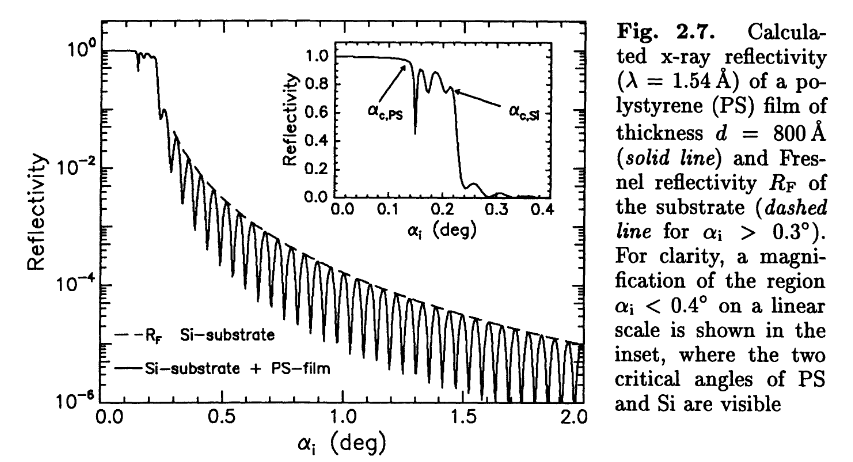